In [1]:
import matplotlib.pyplot as plt
import numpy as np

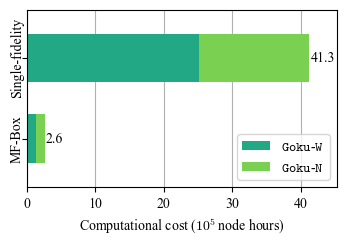

In [47]:
cmap = "viridis"
cmap = plt.get_cmap(cmap)
color_list = [x for x in cmap(np.arange(6)/(6-1))]

unit = 1e5
# MF-Box node hours: W and N
C_MFBox_W = 130885.2
C_MFBox_N = 130873.2

# Single-fidelity node hours: W and N
C_Single_W = 2510928.0
C_Single_N = 1616460.0

# Scale the values by the unit
C_MFBox_W /= unit
C_MFBox_N /= unit
C_Single_W /= unit
C_Single_N /= unit

# Sample data
categories = ['MF-Box', 'Single-fidelity']

values_MF_W = [C_MFBox_W, 0]  # A in Group 1
values_MF_N = [C_MFBox_N, 0]  # B in Group 1
values_SF_W = [0, C_Single_W]  # B in Group 2
values_SF_N = [0, C_Single_N]  # A in Group 2

# Figure size
fig, ax = plt.subplots(figsize=(4, 2.3))

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'

height_bar = 0.6

# Plotting stacked horizontal bar chart
ax.barh(categories, values_MF_W, color=color_list[3], label=r'$\tt{Goku}$'+'-'+r'$\tt{W}$', height=height_bar)
ax.barh(categories, values_MF_N, color=color_list[4], left=values_MF_W, label=r'$\tt{Goku}$'+'-'+r'$\tt{N}$', height=height_bar)
ax.barh(categories, values_SF_W, color=color_list[3], height=height_bar)
ax.barh(categories, values_SF_N, color=color_list[4], left=[0, values_SF_W[1]], height=height_bar)
ax.set_ylim(-0.6, 1.6)
ax.set_xlim(0, C_Single_N + C_Single_W + 4)
# # Annotating component values
# for i, (w, n) in enumerate(zip(values_MF_W, values_MF_N)):
#     if w > 0:  # Annotate MF-Box W
#         ax.text(w / 2, i, f"{w:.1f}", ha='center', va='center', color='black')
#     if n > 0:  # Annotate MF-Box N
#         ax.text(w + n / 2, i, f"{n:.1f}", ha='center', va='center', color='black')

# for i, (w, n) in enumerate(zip(values_SF_W, values_SF_N)):
#     if w > 0:  # Annotate Single-fidelity W
#         ax.text(w / 2, i, f"{w:.1f}", ha='center', va='center', color='black')
#     if n > 0:  # Annotate Single-fidelity N
#         ax.text(w + n / 2, i, f"{n:.1f}", ha='center', va='center', color='black')

# Adding total annotations
for i, (mf_total, sf_total) in enumerate(zip(
    [C_MFBox_W + C_MFBox_N, 0],  # MF-Box total
    [0, C_Single_W + C_Single_N]  # Single-fidelity total
)):
    if mf_total > 0:  # Annotate MF-Box total
        ax.text(mf_total + 0.2, i, f"{mf_total:.1f}", ha='left', va='center', color='black')
    if sf_total > 0:  # Annotate Single-fidelity total
        ax.text(sf_total + 0.2, i, f"{sf_total:.1f}", ha='left', va='center', color='black')

# Adjusting y-axis labels to be parallel to the axis
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories, rotation=90, va='center', ha='center')

ax.grid(True,axis='x')
ax.set_axisbelow(True)

# Adding labels and title
plt.xlabel('Computational cost ('+r'$10^{5}\,$'+'node hours)')
# plt.ylabel('Categories')
# plt.title('Stacked Horizontal Bar Chart')
plt.legend()
# plt.show()
plt.savefig('compare_MF-Box_single-fidelity.pdf', bbox_inches='tight')

In [43]:
print("MF-Box decreases the computational cost by", (1- (C_MFBox_W + C_MFBox_N)/(C_Single_W + C_Single_N)) * 100, "%")

MF-Box decreases the computational cost by 93.65801325196468 %
